<a href="https://colab.research.google.com/github/oneirros/Machine-learning-project/blob/main/Projekt_WdAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wprowadzenie do Analizy Danych** - projekt semestralny
## Wykonali: Jakub Białoń, Natalia Bidzińska

## Motywacja

Choroby układu krążenia, związane są z uszkodzeniem narządów i tkanek wchodzących w skład układu sercowo-naczyniowego, stanowią jedną z głównych przyczyn zgonów na świecie. Wpływ na tak liczne zachorowania ma wiele czynników ryzyka, jednak jak pokazują liczne badania, na choroby układu krążenia chorują osoby u których jednocześnie występuje kilka z poniższych: 
- palenie tytoniu,
- niezdrowa dieta,
- otyłość,
- anemia,
- cukrzyca,
- stres,
- alkohol.

Dlatego tak ważne jest szukanie rozwiązań wspomagających prewencję oraz profilaktykę chorób układu krążenia.


## Plan przetwarzania

1. Pozyskanie surowych danych
2. Analiza statystyczna danych
3. Walidacja krzyżowa
4. Projektowanie algorytmów uczenia maszynowego z optymalizacją parametrów
5. Interpretacja uzyskanych wyników

# Pozyskanie surowych danych



## Pobranie zbioru danych do analizy

Analizowany zbiór danych autorstwa Davide Chicco, Giuseppe Jurman pozyskany został ze strony https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/metadata. Zbiór ten można również znaleźć na stronie https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records.

In [ ]:
dataset_source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv'

## Wstępna analiza pozyskanych danych

Analizowany zbiór danych zawiera podstawowe dane pacjenta oraz informacje zdrowotne. Składa się z  299 instancji. Pozwala ocenić możliwość wystąpienia zgonu na skutek niewydolności serca u pacjenta na podstawie 12 atrybutów:

1. wiek pacjenta (age)
  - Wartość wyrażona w latach. Średnia: 60.8, odchylenie standardowe: 11.9, wartość minimalna: 40, wartość maksymalna: 95
2. występowanie niedokrwistości, czyli zmniejszenia liczby czerwonych krwinek lub hemoglobiny (anaemia)
  - Wartość wyrażona binarnie. Występowanie (wartość 1) stwierdzono u 43.14% pacjentów.
3. poziom CPK (kinazy kreatynowej) we krwi (creatinine_phosphokinase)
  - Wartość wyrażona w mcg/L. Średnia: 582, odchylenie standardowe: 969, wartość minimalna: 23, wartość maksymalna: 7861
4. występowanie cukrzycy (diabetes)
  - Wartość wyrażona binarnie. Występowanie (wartość 1) stwierdzono u 41.81% pacjentów.
5. frakcja wyrzutowa, czyli procent krwi opuszczającej serce przy każdym skurczu (ejection_fraction)
  - Wartość wyrażona w procentach. Średnia: 38.1, odchylenie standardowe: 11.8, wartość minimalna: 14, wartość maksymalna: 80
6. występowanie nadciśnienia tętniczego (high_blood_pressure)
  - Wartość wyrażona binarnie. Występowanie (wartość 1) stwierdzono u 35.12% pacjentów.
7. liczba płytek krwi (platelets)
  - Wartość wyrażona w tys./mL. Średnia: 263 tys., odchylenie standardowe: 97.6 tys., wartość minimalna: 25.1 tys., wartość maksymalna: 850 tys.
8. stężenie kreatyniny w surowicy krwi (serum_creatinine)
  - Wartość wyrażona w mg/dL. Średnia: 1.39, odchylenie standardowe: 1.03, wartość minimalna: 0.5, wartość maksymalna: 9.4
9. stężenie sodu w surowicy krwi (serum_sodium)
  - Wartość wyrażona w mEq/L: Średnia: 137 mEq/L,  odchylenie standardowe: 4.41mEq/L, wartość minimalna: 113 mEq/L, wartość maksymalna: 148 mEq/L
10. płeć pacjenta (sex)
  - Wartość wyrażona binarnie. Kobiet 35.12%, mężczyzn 64.88% 
11. palenie tytoniu (smoking)
  - Wartość wyrażona binarnie. Występowanie (wartość 1) stwierdzono u 32.11% pacjentów
12. czas obserwacji (time)
  - Wartość wyrażona w dniach. Średnia: 130, odchylenie standardowe: 77.5, wartość minimalna: 4, wartość maksymalna: 285

Analiza powyższych atrybutów pozwala  wyodrębnić dwie klasy pacjentów cierpiących na niewydolność układu krążenia - tych, którzy zmarli w trakcie prowadzenia obserwacji (96 instancji) oraz tych, których stan udało się ustabilizować (203 instancje).



# Analiza statystyczna (dane surowe)

## Przygotowanie bibliotek

W celu wykonania analizy statystycznej badanych danych wykorzystano biblioteki:
- Matplotlib
- Numpy
- Pandas
- Seaborn

Są to biblioteki napisane dla języka Python, przeznaczone do manipulacji i analizy danych, a także do graficznego przedstawiania danych.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Wczytanie surowych danych

In [ ]:
raw_dataset = pd.read_csv(dataset_source, header=0)
raw_dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Dane brakujące i zduplikowane

In [ ]:
raw_dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Na podstawie powyższej tabeli stwierdzono, że w zbiorze nie ma żadnych brakujących dancyh, które należałoby uzupełnić.

In [ ]:
print(raw_dataset[raw_dataset.duplicated()])

Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []


Na podstawie powyższego wyniku funkcji stwierdzono, że w zbiorze nie ma żadnyc zduplikowanych rekordów.

## Rozkład rekordów na klasy wynikowe

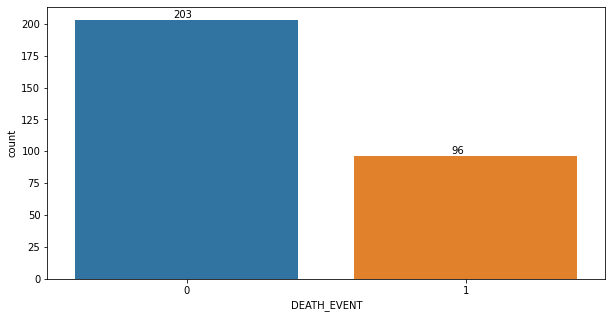

In [ ]:
fig = plt.figure(figsize=[10, 5])

ax = sns.countplot(x="DEATH_EVENT", data=raw_dataset)

total = len(raw_dataset['DEATH_EVENT'])
for p in ax.patches:
        count = format(p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.05
        y = p.get_height() + 2
        ax.annotate(count, (x, y))

plt.show()

Na podstawie powyższego wykresu stwierdzono, że liczba ekordów w jednej klasie jest ok. 2 razy większa od liczby rekordów w drugiej klasie, co zostanie uwzględnione w dalszej pracy nad projektem.

## Statystyki poszczególnych atrybutów

### Bez podziału na klasy wynikowe

In [ ]:
pd.concat([raw_dataset.describe(), pd.DataFrame(raw_dataset.median(), columns=["median"]).T])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000
median,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000


### Z podziałem na klasy wynikowe

Średnia wartość poszczególnych atrybutów z podziałem na klasy wynikowe.

In [ ]:
raw_dataset.groupby("DEATH_EVENT").mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


Wartość mediany poszczególnych atrybutów z podziałem na klasy wynikowe.

In [ ]:
raw_dataset.groupby("DEATH_EVENT").median()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,60.0,0.0,245.0,0.0,38.0,0.0,263000.0,1.0,137.0,1.0,0.0,172.0
1,65.0,0.0,259.0,0.0,30.0,0.0,258500.0,1.3,135.5,1.0,0.0,44.5


### Wykresy pudełkowe

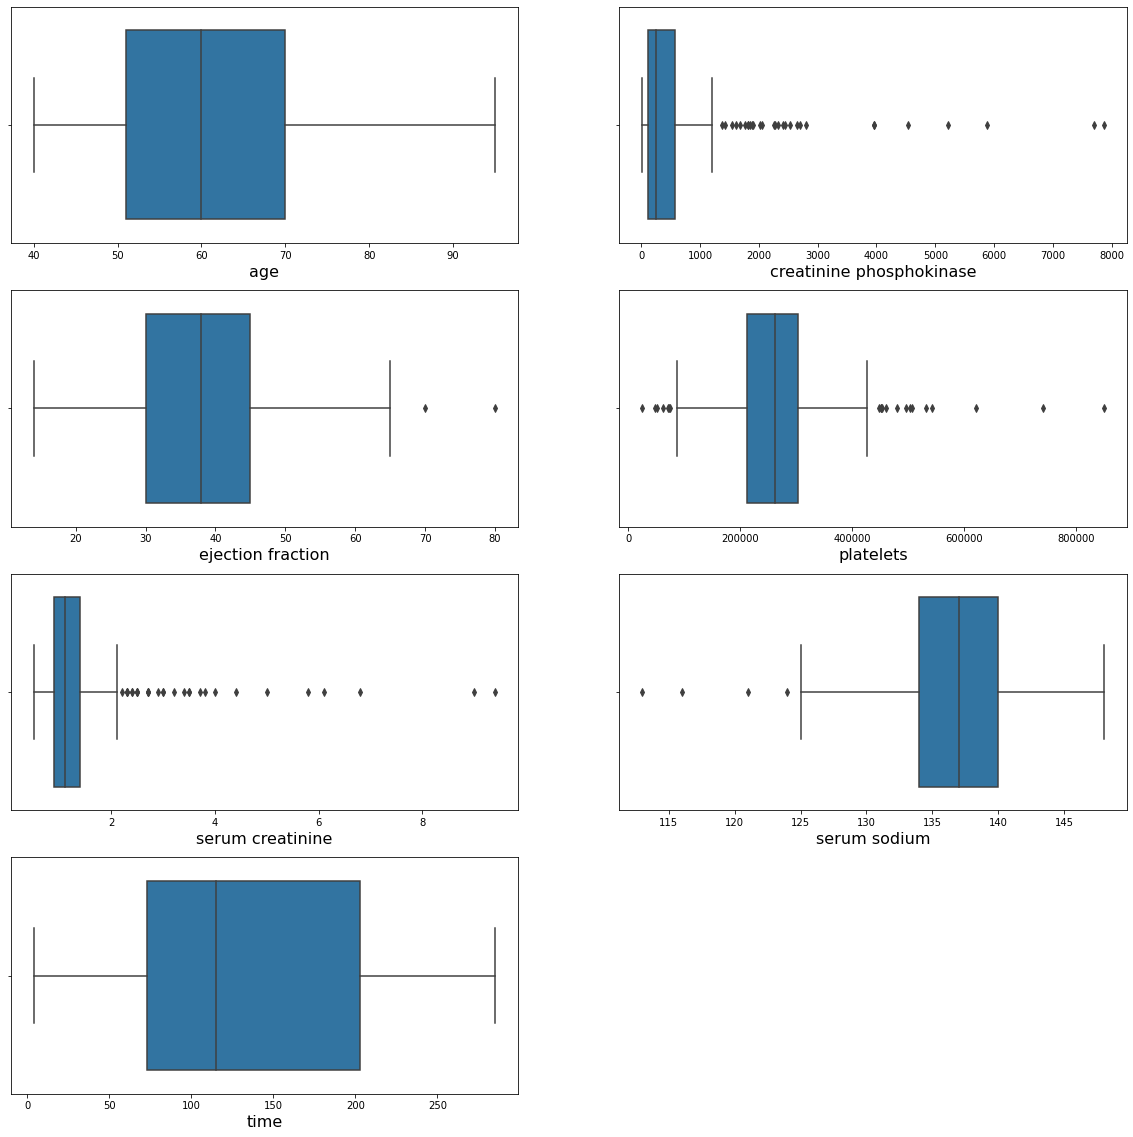

In [ ]:
fig = plt.figure(figsize=[20, 20])

ax = fig.add_subplot(421)
sns.boxplot(x=raw_dataset['age'])
ax.set_xlabel('age', fontsize=16)

ax = fig.add_subplot(422)
sns.boxplot(x=raw_dataset['creatinine_phosphokinase'])
ax.set_xlabel('creatinine phosphokinase', fontsize=16)

ax = fig.add_subplot(423)
sns.boxplot(x=raw_dataset['ejection_fraction'])
ax.set_xlabel('ejection fraction', fontsize=16)

ax = fig.add_subplot(424)
sns.boxplot(x=raw_dataset['platelets'])
ax.set_xlabel('platelets', fontsize=16)

ax = fig.add_subplot(425)
sns.boxplot(x=raw_dataset['serum_creatinine'])
ax.set_xlabel('serum creatinine', fontsize=16)

ax = fig.add_subplot(426)
sns.boxplot(x=raw_dataset['serum_sodium'])
ax.set_xlabel('serum sodium', fontsize=16)

ax = fig.add_subplot(427)
sns.boxplot(x=raw_dataset['time'])
ax.set_xlabel('time', fontsize=16)

plt.show()

Na podstawie powyższych wykresów stwierdzono, że atrybuty ‘creatinine phosphokinase’ oraz ‘serum creatinine’ posiadają najbardziej odstające wartości i w dalszej pracy będzie należało rozważyć ich odrzucenie, aby nie zaburzały wyników. Atrybuty ‘ejection fraction’, ‘platelets’ oraz ‘serum sodium’ również posiadają wartości odstające, jednak są one znacznie bliższe wartościom prawidłowym i ze względu na niewielką liczbę rekordów nie zostaną one wykluczone.

### Histogramy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


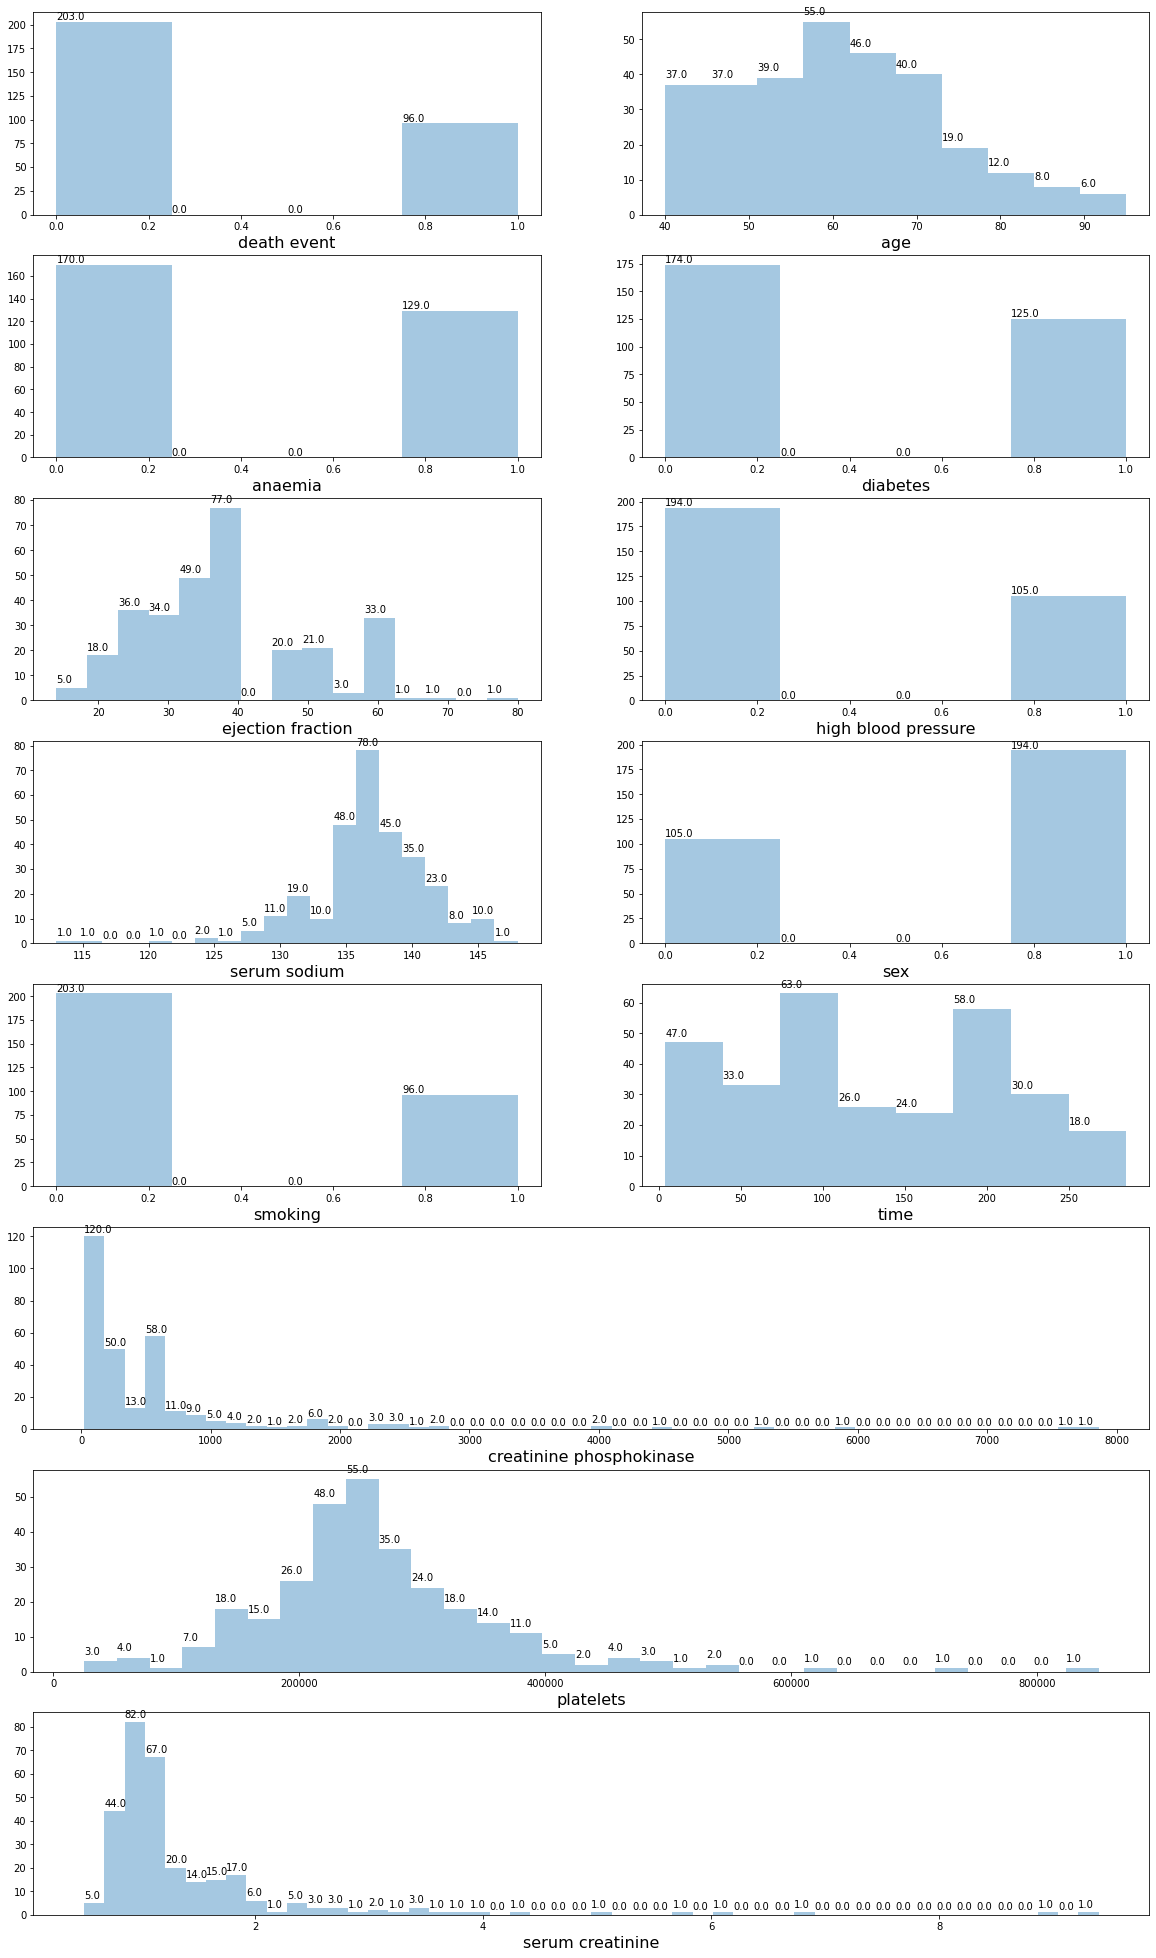

In [ ]:
def count_records(axis, total):
    for p in axis.patches:
        count = format(p.get_height())
        x = p.get_x()
        y = p.get_height() + 2
        ax.annotate(count, (x, y))

fig = plt.figure(figsize=[20, 35])

ax = fig.add_subplot(821)
sns.distplot(raw_dataset['DEATH_EVENT'], kde=False, hist=True)
ax.set_xlabel('death event', fontsize=16)
count_records(ax, len(raw_dataset['DEATH_EVENT']))

ax = fig.add_subplot(822)
sns.distplot(raw_dataset['age'], kde=False, hist=True)
ax.set_xlabel('age', fontsize=16)
count_records(ax, len(raw_dataset['age']))

ax = fig.add_subplot(823)
sns.distplot(raw_dataset['anaemia'], kde=False, hist=True)
ax.set_xlabel('anaemia', fontsize=16)
count_records(ax, len(raw_dataset['anaemia']))

ax = fig.add_subplot(816)
sns.distplot(raw_dataset['creatinine_phosphokinase'], kde=False, hist=True)
ax.set_xlabel('creatinine phosphokinase', fontsize=16)
count_records(ax, len(raw_dataset['creatinine_phosphokinase']))

ax = fig.add_subplot(824)
sns.distplot(raw_dataset['diabetes'], kde=False, hist=True)
ax.set_xlabel('diabetes', fontsize=16)
count_records(ax, len(raw_dataset['diabetes']))

ax = fig.add_subplot(825)
sns.distplot(raw_dataset['ejection_fraction'], kde=False, hist=True)
ax.set_xlabel('ejection fraction', fontsize=16)
count_records(ax, len(raw_dataset['ejection_fraction']))

ax = fig.add_subplot(826)
sns.distplot(raw_dataset['high_blood_pressure'], kde=False, hist=True)
ax.set_xlabel('high blood pressure', fontsize=16)
count_records(ax, len(raw_dataset['high_blood_pressure']))

ax = fig.add_subplot(817)
sns.distplot(raw_dataset['platelets'], kde=False, hist=True)
ax.set_xlabel('platelets', fontsize=16)
count_records(ax, len(raw_dataset['platelets']))

ax = fig.add_subplot(818)
sns.distplot(raw_dataset['serum_creatinine'], kde=False, hist=True)
ax.set_xlabel('serum creatinine', fontsize=16)
count_records(ax, len(raw_dataset['serum_creatinine']))

ax = fig.add_subplot(827)
sns.distplot(raw_dataset['serum_sodium'], kde=False, hist=True)
ax.set_xlabel('serum sodium', fontsize=16)
count_records(ax, len(raw_dataset['serum_sodium']))

ax = fig.add_subplot(828)
sns.distplot(raw_dataset['sex'], kde=False, hist=True)
ax.set_xlabel('sex', fontsize=16)
count_records(ax, len(raw_dataset['sex']))

ax = fig.add_subplot(829)
sns.distplot(raw_dataset['smoking'], kde=False, hist=True)
ax.set_xlabel('smoking', fontsize=16)
count_records(ax, len(raw_dataset['smoking']))

ax = fig.add_subplot(8,2,10)
sns.distplot(raw_dataset['time'], kde=False, hist=True)
ax.set_xlabel('time', fontsize=16)
count_records(ax, len(raw_dataset['time']))

plt.show()

Powyższe histogramy potwierdziły, że wśród wartości atrybutów ‘creatinine phosphokinase’ i ‘serum creatinine’ znajdują się wartości odstające na tyle, że w dalszej pracy konieczne będzie rozważenie ich wykluczenia ze zbioru danych. 

### Dodatkowe wykresy

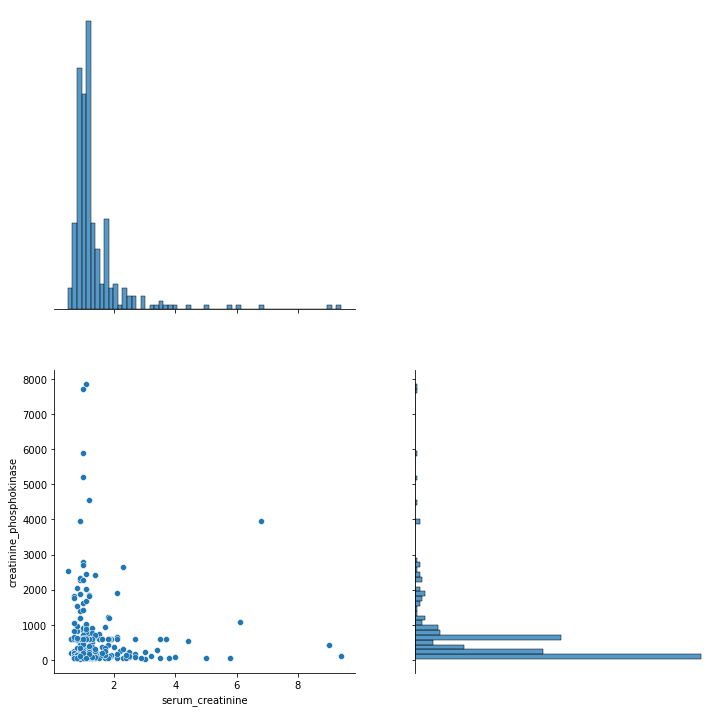

In [ ]:
sns.jointplot(data=raw_dataset, y='creatinine_phosphokinase', x='serum_creatinine', kind='scatter', height=10, ratio=1)

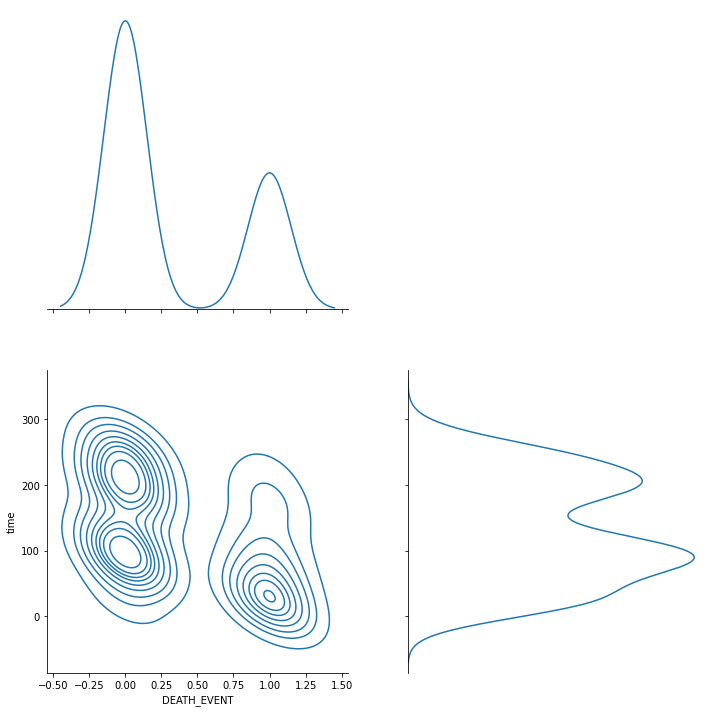

In [ ]:
sns.jointplot(data=raw_dataset, y='time', x='DEATH_EVENT', kind='kde', height=10, ratio=1)

Na podstawie powyższych wykresów stwierdzono, że w razie konieczności wykluczone powinny zostać rekordy, których wartość atrybutu ‘creatinine phosphokinase’ jest wyższa niż 7000 oraz te, których wartość atrybutu ‘serum creatinine’ jest większa niż 8. 

Sporządzono również wykres obrazujący rozkład wartości atrybutu ‘time’ z podziałem na klasy wynikowe. Na jego podstawie można zauważyć, że w przypadkach, kiedy nastąpiła śmierć pacjenta, wartość tego atrybutu jest wyraźnie niższa, niż w przeciwnym razie. Z tego powodu w dalszej pracy będzie należało zwrócić uwagę na to, czy przewidywane wyniki nie bazują jedynie na tym pojedynczym atrybucie.

## Wykres zbiorczy wartości odstających

Wykres ten oznacza odpowiednimi kolorami, które dane w zbiorze są odstające. Wykorzystano tu wynik Z-Score - przy pomocy tej metody obliczony został wynik ‘z’ dla każdej wartości atrybutu i wartości, dla których wynik ‘z’ nie należy do przedziału [-3; 3] mogą być uznane za wartości odstające. Zgodnie z załączoną do wykresu legendą, wartości prawidłowe oznaczone zostały kolorami zielonym i jasnoniebieskim, zaś wartości najbardziej odstające oznaczone są kolorami białym, czerwonym oraz czarnym.

<Figure size 2160x2160 with 0 Axes>

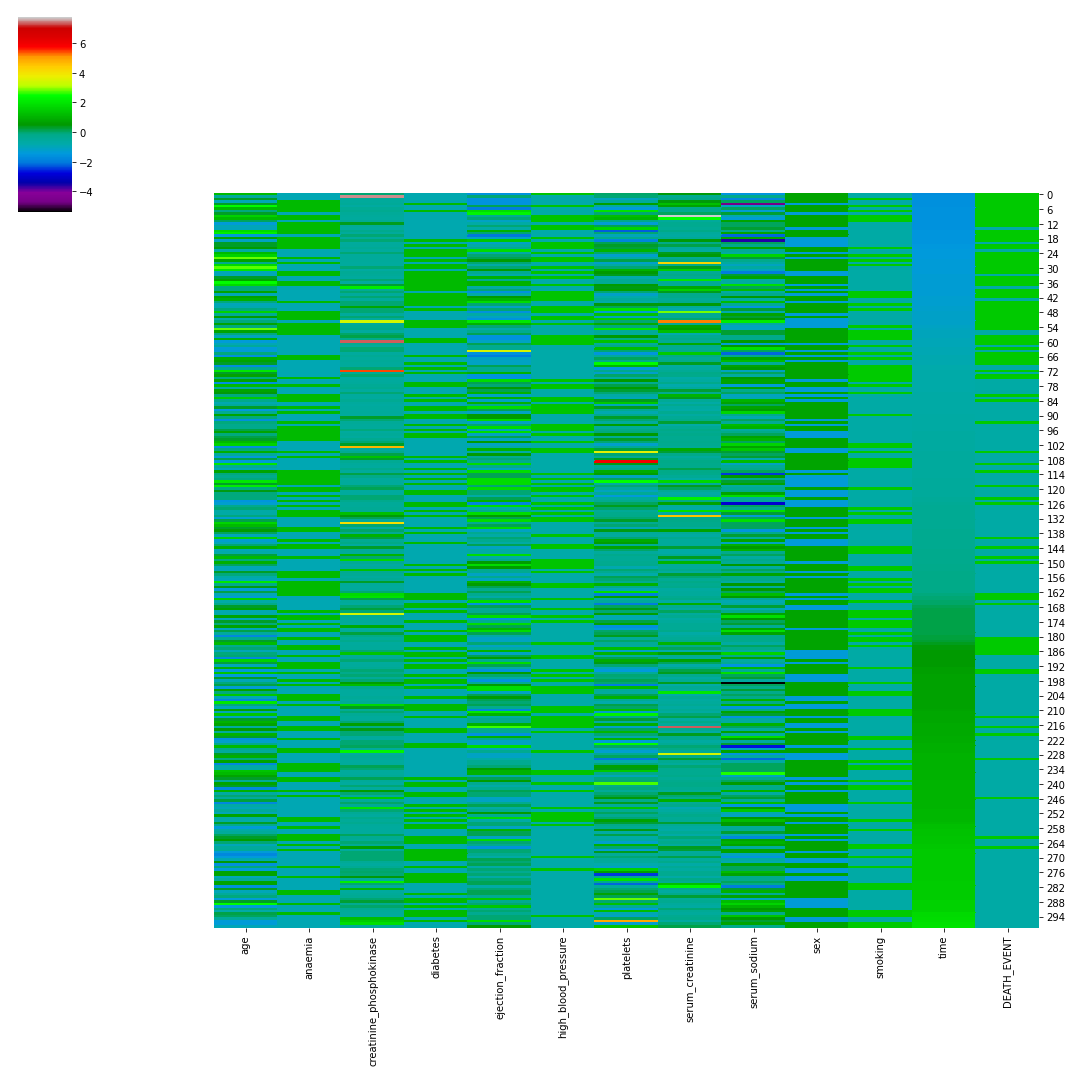

In [ ]:
fig = plt.figure(figsize=[30,30])
sns.clustermap(raw_dataset, z_score=1, col_cluster=False,row_cluster=False,cmap="nipy_spectral",figsize=(15,15))

# Przetwarzanie wstępne z normalizacją

## Przetwarzanie wstępne - kodowanie

Przygotowano zestawienie prezentujące typy atrybutów z analizowanego zbioru.

In [ ]:
raw_dataset.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Stwierdzono, że wszystkie dane są danymi liczbowymi i nie wymagają kodowania.

## Normalizacja

### Przygotowanie bibliotek

W celu znormalizowania badanych danych wykorzystano biblioteki:
- Pandas
- Sklearn (Scikit-Learn)

Są to biblioteki napisane dla języka Python, przeznaczone do manipulacji i analizy danych, a także zawierające implementacje algorytmów wykorzystywanych podczas uczenia maszynowego.

In [ ]:
import pandas as pd
from sklearn import preprocessing

### Wykonanie normalizacji

Do znormalizowania zbioru danych wykorzystano funkcję `minmax_scale` z biblioteki `sklearn.preprocessing`. W ten sposób wartości wszystkich atrybutów zostały przeskalowane do zakresu [0; 1] tak, że najniższa wartość atrybutu została zmieniona na 0, najwyższa - na 1, zaś pozostałe są rozmieszczone między tymi dwiema wartościami.

In [ ]:
normalized = preprocessing.minmax_scale(raw_dataset, feature_range=(0, 1), axis=0)
columns_labels = ','.join(raw_dataset.columns)
normalized_dataset = pd.DataFrame(data=normalized, columns=columns_labels.split(","))
normalized_dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619,0.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206,0.0


# Analiza statystyczna (dane znormalizowane)

## Statystyki poszczególnych atrybutów

In [ ]:
pd.concat([normalized_dataset.describe(), pd.DataFrame(normalized_dataset.median(), columns=["median"]).T])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,0.378798,0.431438,0.071299,0.418060,0.364903,0.351171,0.288833,0.100436,0.675012,0.648829,0.32107,0.449327,0.32107
std,0.216269,0.496107,0.123793,0.494067,0.179316,0.478136,0.118565,0.116237,0.126071,0.478136,0.46767,0.276207,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.200000,0.000000,0.011929,0.000000,0.242424,0.000000,0.227179,0.044944,0.600000,0.000000,0.00000,0.245552,0.00000
50%,0.363636,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000,0.395018,0.00000
75%,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.337495,0.101124,0.771429,1.000000,1.00000,0.708185,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000
median,0.363636,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000,0.395018,0.00000


### Histogramy

Poza zmianą zakresu danych są one dokładnym odwzorowaniem zaprezentowanych wyżej wykresów wykonanych dla nieprzetworzonych danych.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


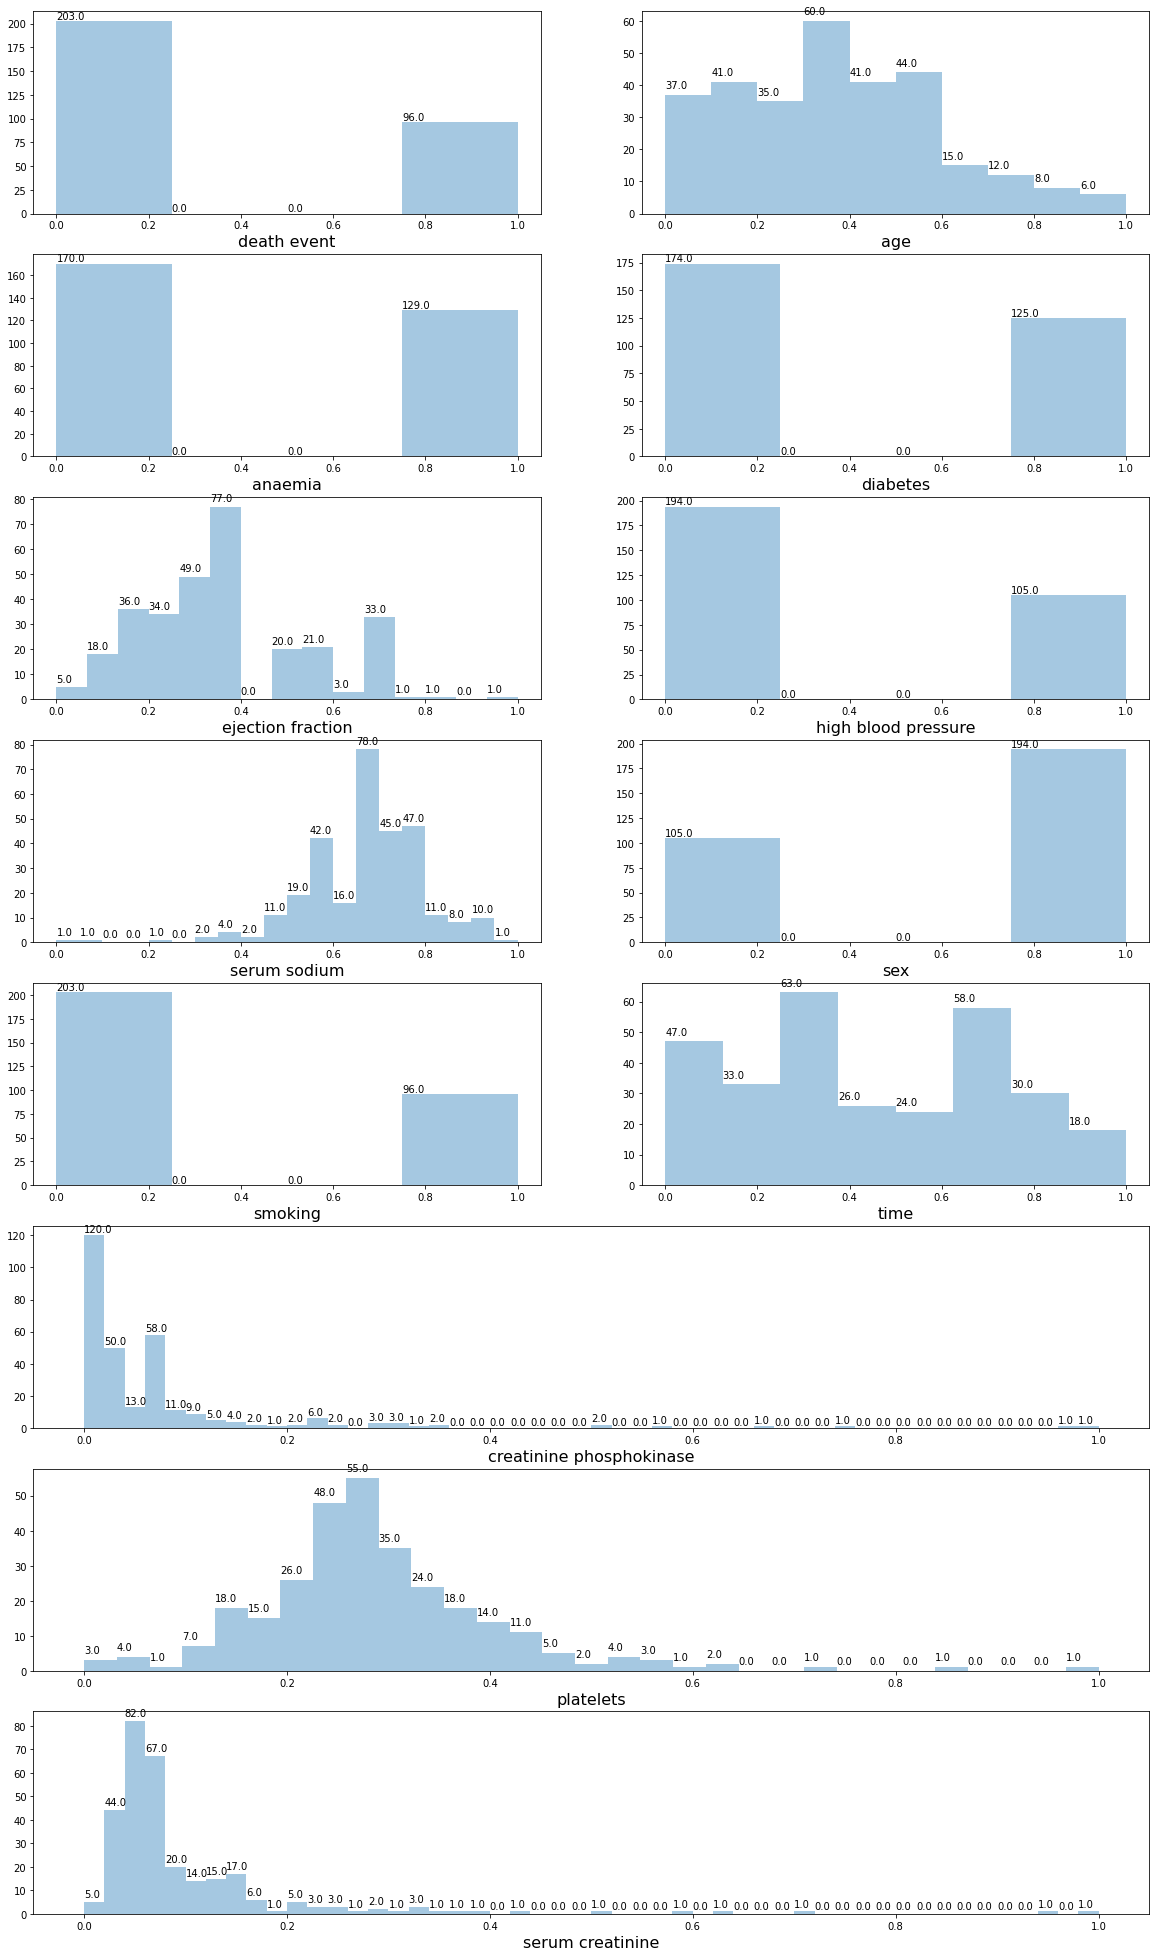

In [ ]:
def count_records(axis, total):
    for p in axis.patches:
        count = format(p.get_height())
        x = p.get_x()
        y = p.get_height() + 2
        ax.annotate(count, (x, y))

fig = plt.figure(figsize=[20, 35])

ax = fig.add_subplot(821)
sns.distplot(normalized_dataset['DEATH_EVENT'], kde=False, hist=True)
ax.set_xlabel('death event', fontsize=16)
count_records(ax, len(normalized_dataset['DEATH_EVENT']))

ax = fig.add_subplot(822)
sns.distplot(normalized_dataset['age'], kde=False, hist=True)
ax.set_xlabel('age', fontsize=16)
count_records(ax, len(normalized_dataset['age']))

ax = fig.add_subplot(823)
sns.distplot(normalized_dataset['anaemia'], kde=False, hist=True)
ax.set_xlabel('anaemia', fontsize=16)
count_records(ax, len(normalized_dataset['anaemia']))

ax = fig.add_subplot(816)
sns.distplot(normalized_dataset['creatinine_phosphokinase'], kde=False, hist=True)
ax.set_xlabel('creatinine phosphokinase', fontsize=16)
count_records(ax, len(normalized_dataset['creatinine_phosphokinase']))

ax = fig.add_subplot(824)
sns.distplot(normalized_dataset['diabetes'], kde=False, hist=True)
ax.set_xlabel('diabetes', fontsize=16)
count_records(ax, len(normalized_dataset['diabetes']))

ax = fig.add_subplot(825)
sns.distplot(normalized_dataset['ejection_fraction'], kde=False, hist=True)
ax.set_xlabel('ejection fraction', fontsize=16)
count_records(ax, len(normalized_dataset['ejection_fraction']))

ax = fig.add_subplot(826)
sns.distplot(normalized_dataset['high_blood_pressure'], kde=False, hist=True)
ax.set_xlabel('high blood pressure', fontsize=16)
count_records(ax, len(normalized_dataset['high_blood_pressure']))

ax = fig.add_subplot(817)
sns.distplot(normalized_dataset['platelets'], kde=False, hist=True)
ax.set_xlabel('platelets', fontsize=16)
count_records(ax, len(normalized_dataset['platelets']))

ax = fig.add_subplot(818)
sns.distplot(normalized_dataset['serum_creatinine'], kde=False, hist=True)
ax.set_xlabel('serum creatinine', fontsize=16)
count_records(ax, len(normalized_dataset['serum_creatinine']))

ax = fig.add_subplot(827)
sns.distplot(normalized_dataset['serum_sodium'], kde=False, hist=True)
ax.set_xlabel('serum sodium', fontsize=16)
count_records(ax, len(normalized_dataset['serum_sodium']))

ax = fig.add_subplot(828)
sns.distplot(normalized_dataset['sex'], kde=False, hist=True)
ax.set_xlabel('sex', fontsize=16)
count_records(ax, len(normalized_dataset['sex']))

ax = fig.add_subplot(829)
sns.distplot(normalized_dataset['smoking'], kde=False, hist=True)
ax.set_xlabel('smoking', fontsize=16)
count_records(ax, len(normalized_dataset['smoking']))

ax = fig.add_subplot(8,2,10)
sns.distplot(normalized_dataset['time'], kde=False, hist=True)
ax.set_xlabel('time', fontsize=16)
count_records(ax, len(normalized_dataset['time']))

plt.show()

# Walidacja krzyżowa

## Przygotowanie bibliotek

W celu wykonania walidacji krzyżowej badanych danych wykorzystano biblioteki:

- Matplotlib
- Numpy
- Pandas
- Sklearn (Scikit-Learn)

Są to biblioteki napisane dla języka Python, przeznaczone do manipulacji i analizy danych, prezentowania ich w formie graficznej, a także zawierające implementacje algorytmów wykorzystywanych podczas uczenia maszynowego.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets._base import Bunch
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

## Przygotowanie zbioru danych

Do przeprowadzenia walidacji krzyżowej zbiór danych musi zostać podzielony na dane oraz target.

In [ ]:
def prepare_dataset(dataset):
    dataset_data = dataset.iloc[:,0:-1]
    dataset_target = dataset.iloc[:, -1]
    
    return Bunch(data=dataset_data, target=dataset_target)

prepared_dataset = prepare_dataset(normalized_dataset)

X = prepared_dataset.data
y = prepared_dataset.target

## Metoda

Do walidacji krzyżowej wykorzystana została metoda `cross_val_score` z biblioteki Sklearn (Scikit-Learn). Metoda ta pozwala automatycznie wykonać 10-krotną walidację krzyżową dla zadanego klasyfikatora, a także oblicza i zwraca jako wynik swojego działania skuteczność klasyfikatora dla badanych danych. Do oceniania skuteczności klasyfikatora można samodzielnie wybrać miarę - w tym przypadku jest to miara F1_score.

Poniżej zaprezentowane zostało przykładowe wykonanie walidacji krzyżowej z algorytmem C-SVC.

In [ ]:
from sklearn import svm  # algorytm C-SVC

# parametry funkcji: klasyfikator, dane, target, liczba zbiorów, miara do oceniania skuteczności
score = cross_val_score(svm.SVC(C=1.0, kernel='linear'), X, y, cv=10, scoring="f1_weighted")

print("WYNIKI:")
print(score)
print("Uśredniona skuteczność klasyfikatora: {}".format(score.mean()))

WYNIKI:
[0.70300334 0.87037037 0.83744614 0.79365079 0.96619598 0.93121693
 0.86136364 0.7625     0.57647059 0.56298381]
Uśredniona skuteczność klasyfikatora: 0.7865201590636743


# Zaprojektowanie algorytmów uczenia maszynowego

## Wybrane algorytmy uczenia maszynowego i klasyfikatory

Do dalszej analizy badanych danych wybrano następujące algorytmy uczenia maszynowego i klasyfikatory:
- maszyna wektorów nośnych
  - nu-SVC
  - C-SVC
- PNN
- MLP

## Przygotowanie bibliotek

W celu wykonania uczenia przy pomocy powyższych klasyfikatorów wykorzystano następujące biblioteki:

- NeuPy
  - `neupy.algotithms.pnn` - klasyfikator PNN
- Sklearn (Scikit-Learn)
  - `sklearn.svm.NuSVC` - maszyna wektorów nośnych nu-SVC; implementacja tej metody bazuje na libsvm
  - `sklearn.svm.SVC` - maszyna wektorów nośnych C-SVC; implementacja tej metody bazuje na libsvm
  - `sklearn.neural_network.MLPClassifier` - klasyfikator MLP

Biblioteka Neupy wymaga zainstalowanej biblioteki Tensorflow w wersji niższej niż 1.14.0 i równocześnie wyższej bądź równej 1.10.1. W przypadku otwierania danego notatnika w Google Collaboratory należy odkomentować wykonać poniższą komórkę kodu, aby zainstalować odpowiednią wersję Tensorflow oraz NeuPy.


In [ ]:
!pip install neupy

     |████████████████████████████████| 235kB 5.2MB/s 
     |████████████████████████████████| 92.7MB 46kB/s 
     |████████████████████████████████| 368kB 49.1MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 3.2MB 39.9MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.13.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: progressbar2 3.38.0
    Unin

In [ ]:
from neupy.algorithms import PNN
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Zaprojektowanie i testowanie poszczególnych algorytmów i klasyfikatorów

Dla każdego parametru wykonano trening oraz testowanie według 10-krotnej walidacji krzyżowej. Dokonano wstępnej optymalizacji wybranych parametrów bazującej na algorytmie Grid Search, aby móc lepiej ocenić skuteczność wybranych algorytmów.

### nu-SVC

Dla algorytmu Nu-SVC wykorzystano metodę ‘sklearn.svm.NuSVC’ z biblioteki Scikit-Learn. Jej implementacja bazuje na bibliotece libsvm. Wykonano trening oraz testowanie według 10-krotnej walidacji krzyżowej dla wartości parametru nu z zakresu [0.1, 0.63] oraz dla wszystkich możliwych wartości parametru kernel (tj. ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’). Otrzymane wyniki przedstawiono w poniższej tabeli oraz na wykresach dla poszczególnych wartości parametru kernel. 

In [ ]:
nu_param_vals = np.linspace(0.1,0.63,30)
kernel_type_vals = ['linear', 'poly', 'rbf', 'sigmoid']
nu_svc_dict = {}    
    
for kernel_type in kernel_type_vals:
    nu_svc_result = []
    nu_svc_means = []
    
    for nu_param in nu_param_vals:
        nu_svc = NuSVC(nu=nu_param, kernel=kernel_type, class_weight='balanced', gamma='auto')
        score = cross_val_score(nu_svc, X, y, cv=10, scoring="f1_weighted")
        nu_svc_result.append(score)
        nu_svc_means.append(score.mean())
                                
    nu_svc_dict[kernel_type] = [nu_svc_result, nu_svc_means]

In [ ]:
d = {'linear': nu_svc_dict['linear'][1], 
     'poly': nu_svc_dict['poly'][1], 
     'rbf': nu_svc_dict['rbf'][1], 
     'sigmoid': nu_svc_dict['sigmoid'][1]}
df = pd.DataFrame(d, index=nu_param_vals)
df

,linear,poly,rbf,sigmoid
0.100000,0.449385,0.636273,0.682379,0.312168
0.118276,0.308651,0.675990,0.678671,0.299862
0.136552,0.397081,0.636077,0.686469,0.298604
0.154828,0.514819,0.674444,0.663052,0.295538
0.173103,0.588606,0.686390,0.688219,0.271418
0.191379,0.551095,0.697936,0.657994,0.272259
0.209655,0.597768,0.664482,0.692406,0.262620
0.227931,0.654337,0.707293,0.672942,0.223956
0.246207,0.700389,0.687307,0.686842,0.256992
0.264483,0.677612,0.669245,0.695126,0.417749


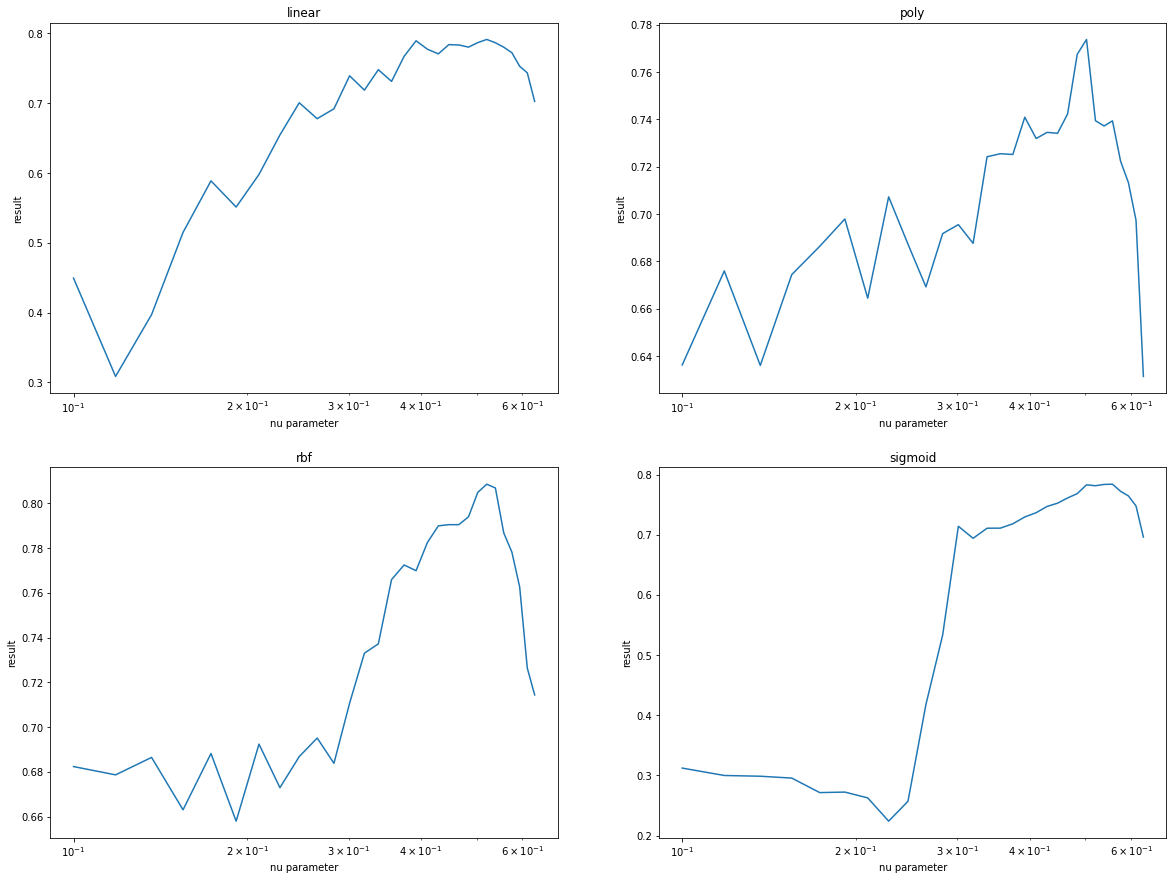

In [ ]:
fig = plt.figure(figsize=(20, 15))

for num in range (1,5):
    ax = fig.add_subplot(2,2,num)
    ax.plot(nu_param_vals, nu_svc_dict[kernel_type_vals[num-1]][1])
    ax.set_xscale('log')
    ax.set_title(kernel_type_vals[num-1])
    ax.set_xlabel('nu parameter')
    ax.set_ylabel('result')

plt.show()

Na podstawie otrzymanych wyników stwierdzono, że algorytm **Nu-SVC** daje najlepsze wyniki dla parametru ***kernel*** o wartości ***'rbf'*** oraz dla parametru ***nu*** o wartości **0.520345**. Najlepszy osiągnięty wynik: **0.808508**. 

### C-SVC

Dla algorytmu C-SVC wykorzystano metodę ‘sklearn.svm.SVC’ z biblioteki Scikit-Learn. Jej implementacja bazuje na libsvm. Wykonano trening oraz testowanie według 10-krotnej walidacji krzyżowej dla wartości parametru C z zakresu [0.0001, 10000] oraz dla wszystkich możliwych wartości parametru kernel (tj. ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’). Otrzymane wyniki przedstawiono w poniższej tabeli oraz na wykresach dla poszczególnych wartości parametru kernel.


In [ ]:
c_paramterer_vals = [10**x for x in range(-3, 4)]
kernel_type_vals = ['linear', 'poly', 'rbf', 'sigmoid']
c_svc_dict = {}

for kernel_type in kernel_type_vals:
    c_svc_result = []
    c_svc_means = []
    for c_param in c_paramterer_vals:
        score = cross_val_score(SVC(C=c_param, kernel=kernel_type), X, y, cv=10, scoring="f1_weighted")
        c_svc_result.append(score)
        c_svc_means.append(score.mean())
    c_svc_dict[kernel_type] = [c_svc_result, c_svc_means]

In [ ]:
d = {'linear': c_svc_dict['linear'][1], 
     'poly': c_svc_dict['poly'][1], 
     'rbf': c_svc_dict['rbf'][1], 
     'sigmoid': c_svc_dict['sigmoid'][1]}
df = pd.DataFrame(d, index=c_paramterer_vals)
df

,linear,poly,rbf,sigmoid
0.001,0.549240,0.549240,0.549240,0.549240
0.010,0.549240,0.549240,0.549240,0.549240
0.100,0.584537,0.703997,0.549240,0.549240
1.000,0.786520,0.734658,0.737267,0.603936
10.000,0.783573,0.671679,0.712369,0.612719
100.000,0.784704,0.672495,0.679550,0.605429
1000.000,0.774197,0.688206,0.684220,0.605724


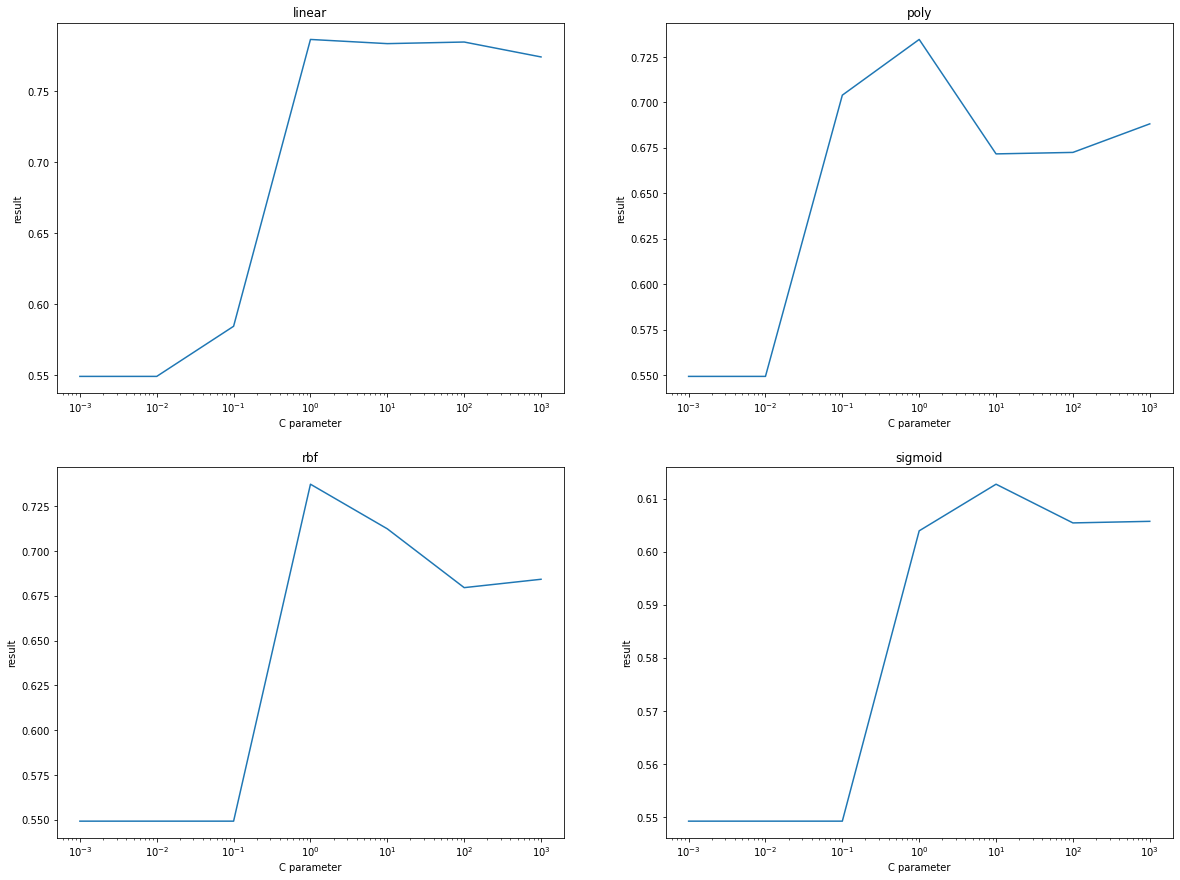

In [ ]:
fig = plt.figure(figsize=(20, 15))

for num in range (1,5):
    ax = fig.add_subplot(2,2,num)
    ax.plot(c_paramterer_vals, c_svc_dict[kernel_type_vals[num-1]][1])
    ax.set_xscale('log')
    ax.set_title(kernel_type_vals[num-1])
    ax.set_xlabel('C parameter')
    ax.set_ylabel('result')

plt.show()

Stwierdzono, że najlepszy wynik uzyskano w przypadku parametru *kernel* ustawionego na *‘linear’* oraz dla parametru *C* wynoszącego 1. Następnie zbadano dane dla *kernel* ustawionego na *‘linear’* oraz dla parametru *C*  z zakresu [0.5, 1.2], aby znaleźć dokładniejszą wartość, dla jakiej algorytm ten będzie najbardziej skuteczny. Wyniki przedstawiono w poniższej tabeli i na wykresie.

In [ ]:
c_paramterer_vals = [x/20 for x in range(10, 25)]
c_svc_dict = {}

c_svc_result = []
c_svc_means = []
for c_param in c_paramterer_vals:
    score = cross_val_score(svm.SVC(C=c_param, kernel='linear'), X, y, cv=10, scoring="f1_weighted")
    c_svc_result.append(score)
    c_svc_means.append(score.mean())

print(max(c_svc_means))

0.7938052083226701


In [ ]:
df = pd.DataFrame({'C': c_paramterer_vals, 'Result': c_svc_means})
df

,C,Result
0,0.50,0.779256
1,0.55,0.781977
2,0.60,0.793805
3,0.65,0.793805
4,0.70,0.786625
5,0.75,0.784210
6,0.80,0.780558
7,0.85,0.784472
8,0.90,0.784472
9,0.95,0.781179


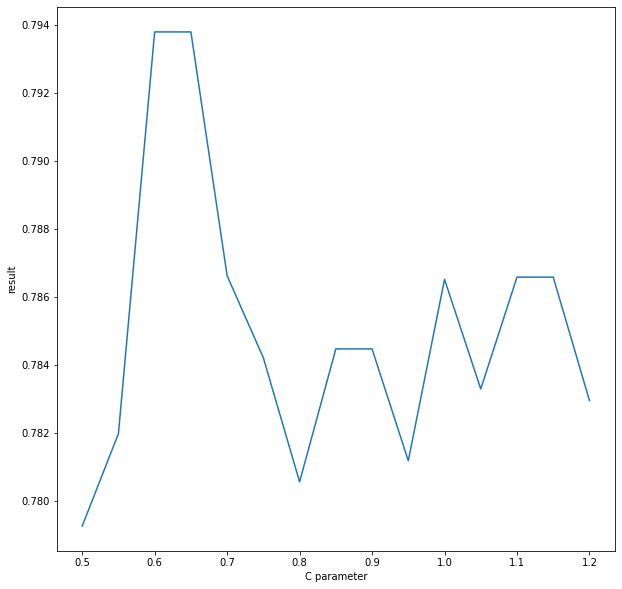

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)
ax.plot(c_paramterer_vals, c_svc_means)
ax.set_xlabel('C parameter')
ax.set_ylabel('result')

plt.show()

Na podstawie otrzymanych wyników stwierdzono, że skuteczność algorytmu ***C-SVC*** jest najwyższa, tj. **0.793805**, dla parametru ***kernel*** ustawionego na ***‘linear’*** oraz dla parametru ***C*** wynoszącego ok. **0.6**.

### PNN

Dla klasyfikatora PNN wykorzystano metodę ‘neupy.algorithms.PNN’ z biblioteki NeuPy, przeznaczonej do budowania sieci neuronowych. Wykonano trening oraz testowanie według 10-krotnej walidacji krzyżowej dla wartości parametru odchylenia standardowego std z zakresu [1, 15]. Otrzymane wyniki przedstawiono w poniższej tabeli i na wykresie.

In [ ]:
std_values = [x for x in range (1, 16)]

pnn_result = []
pnn_means = []
for std_val in std_values:
    score = cross_val_score(PNN(std=std_val, verbose=False), X, y, cv=10, scoring="f1_weighted")
    pnn_result.append(score)
    pnn_means.append(score.mean())

In [ ]:
df = pd.DataFrame({'std': std_values, 'Result': pnn_means})
df

,std,Result
0,1,0.696349
1,2,0.728584
2,3,0.728904
3,4,0.728904
4,5,0.728904
5,6,0.728904
6,7,0.728904
7,8,0.728904
8,9,0.728904
9,10,0.728904


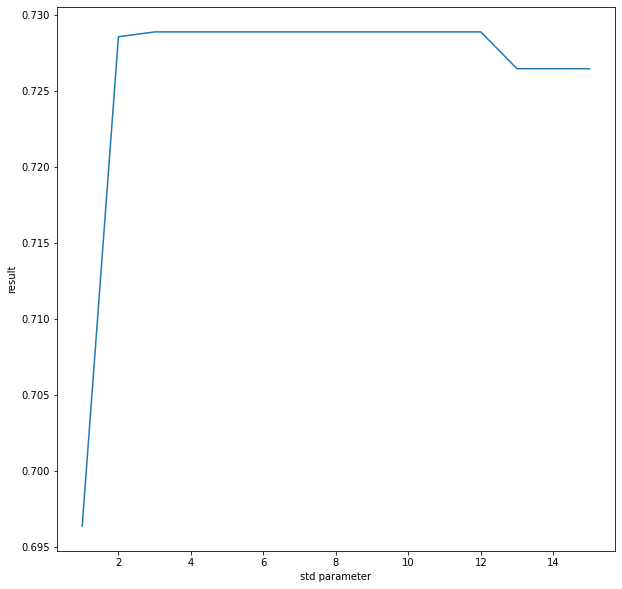

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)
ax.plot(std_values, pnn_means)
ax.set_xlabel('std parameter')
ax.set_ylabel('result')

plt.show()

Stwierdzono, że skuteczność algorytmu ***PNN*** jest najwyższa, tj. **0.728904**, dla parametru ***std*** znajdującego się w przedziale **[2, 12]**.

### MLP

Dla klasyfikatora MLP wykorzystano metodę z biblioteki Scikit-Learn: ‘sklearn.neural_network.MLPClassifier’. Wykonano trening oraz testowanie według 10-krotnej walidacji krzyżowej dla konkretnych wartości parametru *hidden_layer_sizes*: [20, 50, 70, 100, 200] oraz dla różnych funkcji aktywacji (tj. *‘identity’, ‘logistic’, ‘tanh’, ‘relu’*). Otrzymane wyniki przedstawione w poniższej tabeli i na wykresach.

In [ ]:
mlp_param_vals = [20, 50, 70, 100]
function_type_vals = ['identity', 'logistic', 'tanh', 'relu']
mlp_dict = {}    
    
for function_type in function_type_vals:
    mlp_result = []
    mlp_means = []
    
    for mlp_param in mlp_param_vals:
        mlp = MLPClassifier(hidden_layer_sizes=mlp_param, max_iter=3000)
        score = cross_val_score(mlp, X, y, cv=10, scoring="f1_weighted")
        mlp_result.append(score)
        mlp_means.append(score.mean())
                                
    mlp_dict[function_type] = [mlp_result, mlp_means]

In [ ]:
d = {'identity': mlp_dict['identity'][1], 
     'logistic': mlp_dict['logistic'][1],
     'tanh': mlp_dict['tanh'][1],
     'relu': mlp_dict['relu'][1]}
df = pd.DataFrame(d, index=mlp_param_vals)
df

,identity,logistic,tanh,relu
20,0.776151,0.770258,0.765403,0.787129
50,0.724305,0.745363,0.727479,0.737971
70,0.731046,0.735518,0.708727,0.718829
100,0.723185,0.694745,0.692470,0.708874


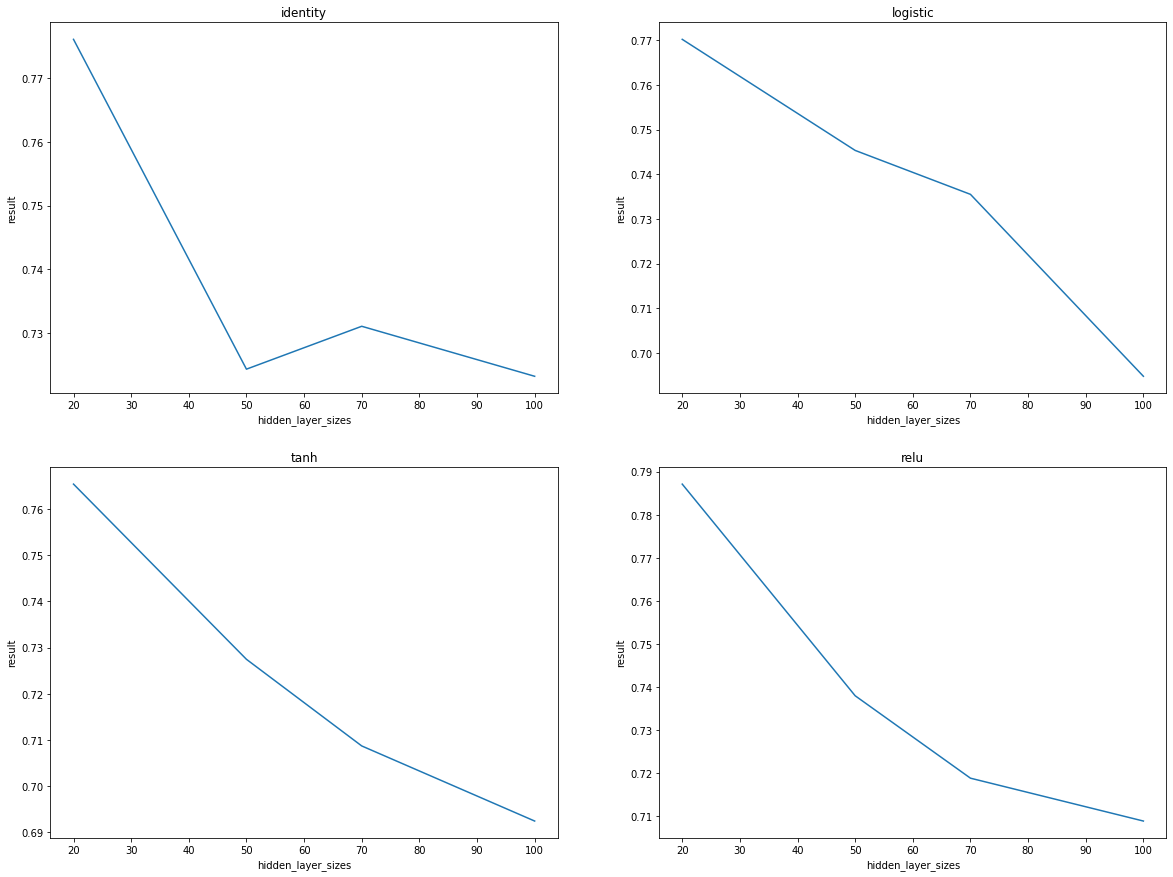

In [ ]:
fig = plt.figure(figsize=(20, 15))

for num in range (1,5):
    ax = fig.add_subplot(2,2,num)
    ax.plot(mlp_param_vals, mlp_dict[function_type_vals[num-1]][1])
    ax.set_title(function_type_vals[num-1])
    ax.set_xlabel('hidden_layer_sizes')
    ax.set_ylabel('result')

plt.show()

Na podstawie powyższych wyników stwierdzono, że skuteczność algorytmu ***MLP*** maleje dla dużych rozmiarów warstwy ukrytej. Najlepszy wynik, tj. **0.781608**, otrzymano dla funkcji aktywacji ***'relu'*** przy rozmiarze warstwy ukrytej równej **20**.

# Optymalizacja parametrów

## Metoda

Do optymalizacji wykorzystana została metoda `GridSearchCV` z biblioteki Sklearn (Scikit-Learn). Metoda ta pozwala automatycznie wykonać 10-krotną walidację krzyżową dla zadanego klasyfikatora z optymalizacją zadanych jako argument parametrów, a także oblicza i zwraca jako wynik swojego działania skuteczność klasyfikatora dla badanych danych. Do oceniania skuteczności klasyfikatora można samodzielnie wybrać miarę - w tym przypadku jest to miara F1_score.

## Przygotowanie bibliotek

W celu wykonania optymalizacji parametrów wybranych klasyfikatorów wykorzystano biblioteki:

- Sklearn (Scikit-Learn)

Jest to biblioteka napisane dla języka Python, zawierająca implementacje algorytmów wykorzystywanych podczas uczenia maszynowego, w tym również metody służące do optymalizacji parametrów.

In [ ]:
from sklearn.model_selection import GridSearchCV

## Optymalizacja poszczególnych algorytmów i klasyfikatorów

### nu-SVC

W przypadku algorytmu nu-SVC do optymalizacji wybrano parametry:

- 'nu'
- 'kernel'
- 'degree' - parametr powiązany z jądrem 'poly'
- 'gamma' - parametr powiązany z jądrami 'rbf', 'poly', 'sigmoid'
- 'decision_function_shape'

In [ ]:
nu_svc = NuSVC()

lista = np.linspace(0.50,0.55,40)

param = {
    'nu': lista,
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2,3,4],
    'gamma' : ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr']
}

bla = GridSearchCV(estimator=nu_svc, param_grid=param, cv=10, scoring='f1_weighted')
result = bla.fit(X, y)
print("Best score: {0}\nBest param {1}".format(result.best_score_, result.best_params_))

Best score: 0.8085861528637818
Best param {'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.5115384615384615}


Na podstawie wyniku wykonania powyższej komórki kodu stwierdzono, że najlepszą skuteczność algorytmu ***nu-SVC*** wynoszącą **0.808586** osiągnięto dla parametrów: 

- *nu* = 0.511538
- *kernel* = *'rbf'*
- *gamma* = *'auto'*
- *decision_function_shape* = *'ovo'*

### C-SVC

W przypadku algorytmu C-SVC do optymalizacji wybrano parametry:

- 'C'
- 'kernel'
- 'degree' - parametr pozwiązany z jądrem 'poly'
- 'gamma' - parametr powiązany z jądrami 'rbf', 'poly', 'sigmoid'
- 'coef0' - parametr powiązany z jądrami 'poly', 'sigmoid'

In [ ]:
param = {
    'C': [x/8 for x in range(1,16)],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['auto', 'scale'],
    'degree': [x for x in range(2,5)],
    'coef0': [x for x in range(-2,6)]
}

c_svc_grid_cv = GridSearchCV(estimator=SVC(), param_grid=param, cv=10, scoring='f1_weighted')
score = c_svc_grid_cv.fit(X, y)
print("Best score: {0}\nBest param {1}".format(score.best_score_, score.best_params_))

Best score: 0.8027250857051277
Best param {'C': 0.25, 'coef0': 5, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}


Na podstawie wyniku wykonania powyższej komórki kodu stwierdzono, że najlepszą skuteczność algorytmu ***C-SVC*** wynoszącą **0.802725** osiągnięto dla parametrów: 

- *C* = 0.25
- *kernel* = *'poly'*
- *gamma* = *'auto'*
- *coef0* = 5

### PNN

W przypadku klasyfikatora PNN do optymalizacji wybrano parametry:

- 'std'

In [ ]:
std_values = [x for x in range (1, 16)]

param = {
    'std': std_values
}

pnn_grid_cv = GridSearchCV(estimator=PNN(std=0.), param_grid=param, cv=10, scoring='f1_weighted')
score = pnn_grid_cv.fit(X, y)
print("Najwyższa skuteczność: {0} osiągnięta dla parametrów: {1}".format(score.best_score_, score.best_params_))

Najwyższa skuteczność: 0.7289042320937822 osiągnięta dla parametrów: {'std': 3}


Na podstawie wyniku wykonania powyższej komórki kodu stwierdzono, że najlepszą skuteczność klasyfikatora ***PNN*** wynoszącą **0.728904** osiągnięto dla parametrów: 

- *std* = 3

### MLP

W przypadku algorytmu MLP do optymalizacji wybrano parametry:

- hidden_layer_sizes
- activation
- solver
- alpha
- learning_rate_init - parametr brany pod uwagę tylko gdy 'solver' jest ustawiony 'sgd' lub 'adam'
- shuffle - parametr brany pod uwagę tylko gdy 'solver' jest ustawiony na 'sgd' lub 'adam' 
- max_iter

In [ ]:
mlp = MLPClassifier()

param = {
    'hidden_layer_sizes': [15,20,25],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.0002, 0.004],
    'learning_rate_init': [0.001, 0.002],
    'shuffle': [True, False],
    'max_iter': [3000, 4000]
}

bla = GridSearchCV(estimator=mlp, param_grid=param, cv=10, scoring="f1_weighted")
result = bla.fit(X, y)
print("Best score: {0}\nBest param {1}".format(result.best_score_, result.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Best score: 0.8169850354059166
Best param {'activation': 'relu', 'alpha': 0.004, 'hidden_layer_sizes': 15, 'learning_rate_init': 0.001, 'max_iter': 4000, 'shuffle': True, 'solver': 'adam'}


In [ ]:
mlp = MLPClassifier()

param = {
    'hidden_layer_sizes': [15,20,25],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.0002, 0.004],
    'learning_rate_init': [0.001, 0.002],
    'shuffle': [True, False],
    'max_iter': [3900, 4100]
}

bla = GridSearchCV(estimator=mlp, param_grid=param, cv=10, scoring="f1_weighted")
result = bla.fit(X, y)
print("Best score: {0}\nBest param {1}".format(result.best_score_, result.best_params_))

Best score: 0.8001689648442054
Best param {'activation': 'identity', 'alpha': 0.004, 'hidden_layer_sizes': 25, 'learning_rate_init': 0.002, 'max_iter': 4100, 'shuffle': True, 'solver': 'sgd'}


Na podstawie wyniku wykonania powyższej komórki kodu stwierdzono, że najlepszą skuteczność klasyfikatora ***MLP*** wynoszącą **0.816985** osiągnięto dla parametrów: 

- *hidden_layer_sizes* = 0.525128
- *activation* = *'rbf'*
- *solver* = *'adam'*
- *alpha* = 0.004
- *learning_rate_init* = 0.001
- *shuffle* = True
- *max_iter* = 4000

# Ocena uzyskanych danych

## Miara oceny skuteczności klasyfikatorów

Skuteczność badanych klasyfikatorów określono na podstawie wyników otrzymanych z funkcji `cross_val_score` oraz `GridSearchCV`. Do oceniania skuteczności klasyfikatora wybrano miarę **'F1_score'**, ze względu na dużą rozbieżność w ilości danych w klasach wynikowych.

## Porównanie skuteczności klasyfikatorów przed i po optymalizacji parametrów

W poniższej tabeli zestawiono otrzymane wartości skuteczności poszczególnych klasyfikatorów przed i po optymaliacji parametrów.

|Klasyfikator|nu-SVC|C-SVC|PNN|MLP|
|--:|:-:|:-:|:-:|:-:|
|Skuteczność przed optymalizacją|0.808508|0.793805|0.728904|0.781608|
|Skuteczność po optymalizacji|0.808586|0.802725|0.728904|0.816985|

Na podstawie powyszej tabeli stwierdzono, że optymalizacja parametrów najbardziej poprawiła skuteczność klasyfikatora MLP oraz C-SVC. Skuteczność algorytmu nu-SVC nieznacznie wzrosła, zaś skuteczność klasyfikatora PNN nie zmieniła się.

## Porównanie skuteczności klasyfikatorów ze zoptymalizowanymi parametrami

W tabeli przedstawiono skuteczność poszczególnych algorytmówi  klasyfikatorów ze zoptymalizowanymi wartościami parametrów

|Klasyfikator|nu-SVC|C-SVC|PNN|MLP|
|--:|:-:|:-:|:-:|:-:|
|Parametry|*nu* = 0.511538, <br />*kernel* = *'rbf'*, <br />*gamma* = *'auto'*, <br />*decision_function_shape* = *'ovo'*|*C* = 0.25, <br />*kernel* = *'poly'*, <br />*gamma* = *'auto'*, <br />*coef0* = 5|*std* = 3|*hidden_layer_sizes* = 0.525128<br/>*activation* = *'rbf'*<br/>*solver* = *'adam'*<br/>*alpha* = 0.004<br/>*learning_rate_init* = 0.001<br/>*shuffle* = True<br/>*max_iter* = 4000 <br />|
|Skuteczność|0.808586|0.802725|0.728904|0.816985|

Stwierdzono, że po optymalizacji parametrów dla badanych danych największą skuteczność ma klasyfikator **MLP**, niewiele niższą skuteczność wykazały klasyfikatory **nu-SVC** oraz **C-SVC**, zaś klasyfikator **PPN** okazał się znacznie mniej skuteczny od pozostałych.